# E-05. 나와 닮은 연예인 찾기

1. 사진 모으기
2. 얼굴 영역 자르기
3. 얼굴 영역의 임베딩 추출하기
4. 모은 연예인들과 비교하기
5. 다양한 재미있는 시각화 시도해보기


---

## 1. 사진 모으기

- 셀카 2장

- 연예인 사진 250장 

<br>

### 1-1. 내 사진 확인하기

연예인 사진 속에 섞어놓은 내 사진 2개를 확인해보자.

정면사진, 측면사진으로 넣어봤다.

file_list1: ['김성연0.jpg', '김성연1.jpg', '.ipynb_checkpoints']


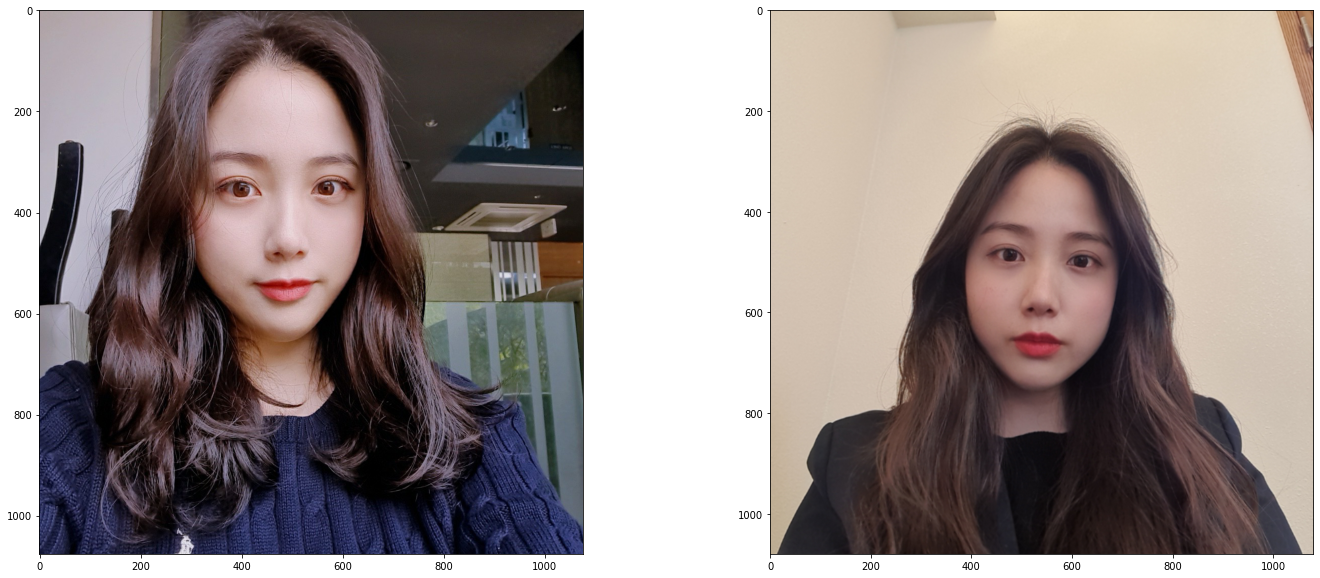

In [1]:
# 내 사진 확인하기

import os
import matplotlib.pyplot as plt
import matplotlib.image as img

# 이미지 불러오기
dir_path1= os.getenv('HOME')+'/aiffel/face_embedding/me'
file_list1 = os.listdir(dir_path1)

print ("file_list1: {}".format(file_list1))

#Set figsize here
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path1+'/'+file_list1[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

---

### 1-2. 연예인 사진 가져오기
- 연예인과 내 사진을 같이 불러온다.

- 사진 목록 확인

- 사진 6개 확인해보기

file_list: ['박진영.jpg', '민선예.jpg', '김혜지.jpg', '임성언.jpg', '아이유.jpg', '윤보라.jpg', '김대명.jpg', '디오.jpg', '윤아정.jpg', '나르샤.jpg', '이민정.jpg', '간미연.jpg', '정보민.jpg', '박명수.jpg', '츄.png', '정신혜.JPG', '수호.jpg', '강다니엘.png', '김규선.jpg', '진세연.jpg', '차주영.jpg', '수영.jpg', '차화연.jpg', '김세정.jpg', '김종국.jpg', '보나.jpg', '공유.jpg', '오연서.jpg', '갈소원.jpg', '김혜자.jpg', '김혜윤.jpg', '김규리.jpg', '이다해.jpg', '김자옥.jpg', '이다윗.jpg', '김정화.jpg', '옥주현.jpg', '안은진.jpg', '김성연0.jpg', '정애리.jpg', '류수영.jpg', '박예진.jpg', '임윤아.jpg', '김민경.jpg', '신예은.png', '정수정.jpg', '심은진.jpg', '이상윤.jpg', '엄지원.jpg', '차은우.png', '이보영.jpg', '정라엘.jpg', '전효성.jpg', '임주은.jpg', '아이린.png', '유진.jpg', '이상이.jpg', '김원희.jpg', '임예진.jpg', '김도연.jpg', '한혜진.jpg', '류준열.jpg', '김소혜.png', '진기주.jpg', '박신혜.jpg', '정려원.jpg', '김민주.jpg', '김민희.jpg', '소주연.jpg', '이상엽.jpg', '김나영.jpg', '임수정.jpg', '박소담.png', '고준희.jpg', '신은수.jpg', '손지현.jpg', '장나라.jpg', '신세경.jpg', '레이디 제인.jpg', '소유진.jpg', '박보영.jpg', '강두리.jpg', '강석우.jpg', '문근영.jpg', '김지호.jpg', '백현.jpg', '구혜선.jpg', '다나.jpg', '박해수.png', '고아라.jpg', '남궁

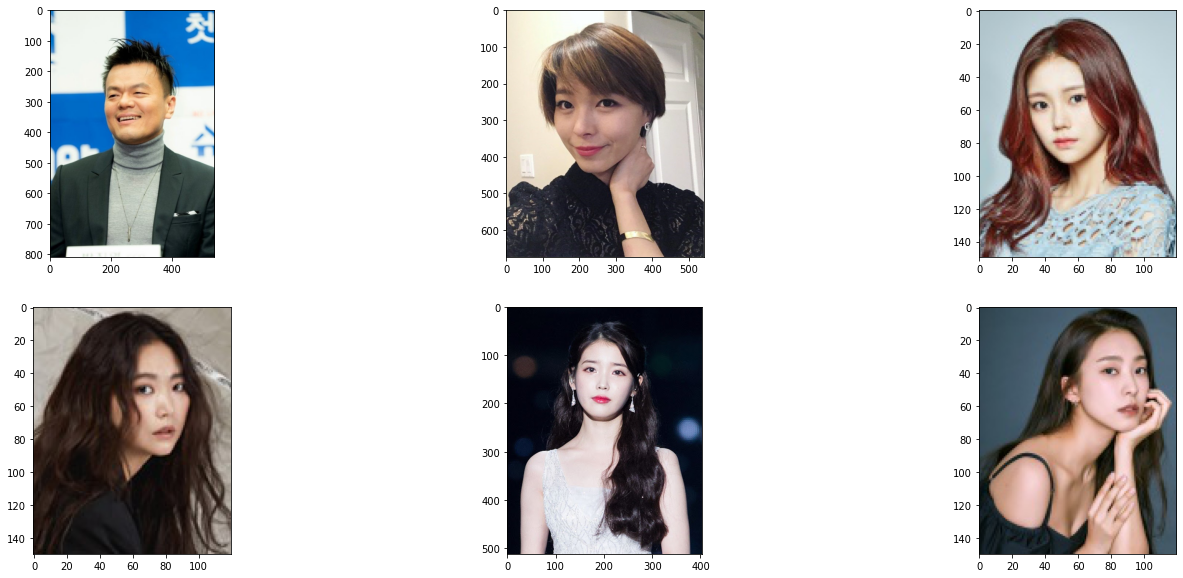

In [2]:
# 이미지 불러오기 (연에인 + 나)
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

- 사진 전체 수 확인

In [3]:
print("총 사진의 수:", len(file_list))

총 사진의 수: 252


---

## 2. 이미지에서 얼굴 크롭하기

- 내 사진 먼저 크롭해본다

[(247, 675, 632, 290)]


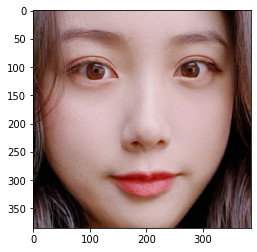

In [4]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path1 = os.getenv('HOME')+'/aiffel/face_embedding/me/김성연0.jpg'
image = face_recognition.load_image_file(image_path1)
face_locations1 = face_recognition.face_locations(image)

print(face_locations1)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations1[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

- 이미지에서 얼굴을 크롭하는 함수를 생성한다.

- 크롭 함수를 통해 내 사진 2장을 크롭해본다.

In [5]:
# 이미지 파일 경로를 파라미터로 넘기면 얼굴 영역만 잘라주는 함수
import face_recognition
import os

def get_cropped_face(image_file):
    
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

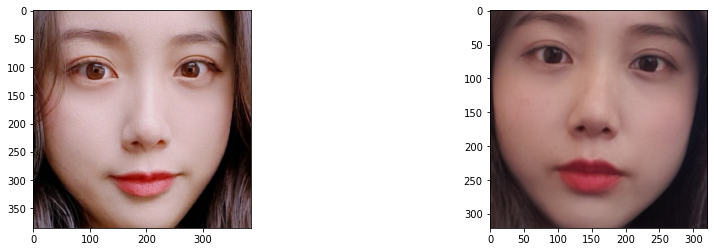

In [6]:
image_path0 = os.getenv('HOME')+'/aiffel/face_embedding/me/김성연0.jpg'
image_path1 = os.getenv('HOME')+'/aiffel/face_embedding/me/김성연1.jpg'

cropped_face0 = get_cropped_face(image_path0)
cropped_face1 = get_cropped_face(image_path1)

plt.figure(figsize=(15,4))
ax1 = plt.subplot(1, 2, 1)
ax1 = plt.imshow(cropped_face0)
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.imshow(cropped_face1)


plt.show()

- 내 사진 중 임베딩 추출이 되지 않는 사진이 있는지 확인해본다.

In [7]:
# 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding0 = get_face_embedding(cropped_face0)  
embedding1 = get_face_embedding(cropped_face1)   

# 임베딩 추출 확인
print(len(embedding0[0]))
print(len(embedding1[0]))

128
128


---

## 3. 임베딩 구하기
- 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수를 생성한다.

- 잘 임베딩 됐는지 확인해보기 위해 내 사진 1장으로 확인해본다.

In [8]:
# 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수 생성
cropped_face_dict = {}
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    for file in file_list:
        try:
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  
            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            continue
            
    return embedding_dict

In [9]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['김성연0']

array([-0.0429923 ,  0.02385914,  0.03236046, -0.08528119, -0.11694999,
       -0.02619966, -0.07772443, -0.05117776,  0.14524534, -0.15900864,
        0.18078576, -0.10639251, -0.19762686, -0.03809688, -0.08927833,
        0.24568078, -0.19330956, -0.14275047, -0.00352005,  0.02292871,
        0.07368333,  0.09675785, -0.02178398,  0.05628799, -0.14437661,
       -0.3396987 , -0.10360802, -0.06163171, -0.03414617, -0.10433135,
       -0.03833168,  0.06439997, -0.15359931,  0.01545545,  0.03961828,
        0.11610681,  0.00988787, -0.07326385,  0.15320981,  0.07742781,
       -0.30267304,  0.05001744,  0.05227938,  0.29254144,  0.15091613,
       -0.01846826,  0.00259437, -0.14875674,  0.10449585, -0.16449665,
        0.01484668,  0.11725481,  0.01862128,  0.03643162,  0.00207652,
       -0.06999095,  0.05533753,  0.16288541, -0.15659194,  0.03152609,
        0.12447435, -0.06220835,  0.01990883, -0.04545414,  0.17445204,
        0.01417676, -0.10244107, -0.22670287,  0.11123788, -0.19

- 얼굴간의 임베딩 사이 거리를 구하는 함수 생성

- 내 사진 2개로 비교해본다.

In [10]:
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('김성연0', '김성연1')

0.2332592987118

---

## 4. 닮은 꼴 연예인 찾기

In [11]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고,
#name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [12]:
# name 인자에 특정 사람 이름을 주면 그 사람과 가장 닮은 다른 이미지와 
# 거리 정보를 가장 가까운 순으로 정렬해서 표시하는 함수 만들기

def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))


In [13]:
def get_nearest_face_top10(name, top=10):
    top10_dict = {}
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            top10_dict[sorted_faces[i][0]] = sort_key_func(sorted_faces[i][0])  
    return top10_dict
    

In [14]:
# 수치 비교를 위해 또 다른 나의 사진을 포함하여 결과를 출력하였다.
get_nearest_face('김성연0')

순위 1 : 이름(김성연1), 거리(0.2332592987118)
순위 2 : 이름(강미나), 거리(0.309783372305847)
순위 3 : 이름(이현주), 거리(0.315809812842352)
순위 4 : 이름(채수아), 거리(0.333321660770395)
순위 5 : 이름(루다), 거리(0.3368661692586978)
순위 6 : 이름(진지희), 거리(0.3493556508378655)


In [15]:
# 수치 비교를 위해 또 다른 나의 사진을 포함하여 결과를 출력하였다.
get_nearest_face('김성연1')

순위 1 : 이름(김성연0), 거리(0.2332592987118)
순위 2 : 이름(신예은), 거리(0.33304758237412657)
순위 3 : 이름(박나래), 거리(0.3364127916344315)
순위 4 : 이름(진지희), 거리(0.33683499101425146)
순위 5 : 이름(제아), 거리(0.3495496511495568)
순위 6 : 이름(강미나), 거리(0.35863415534940946)


---
## 5. 재미있는 시각화 시도해보기



### 5-1. 닮은 연예인과 나의 얼굴 비교하기
나와 닮은 연예인 Top5의 크롭 이미지와 나의 얼굴을 비교해본다.

나의 사진은 2개였기 때문에 김성연0, 김성연1 파일로 구분하여 나타내었다.



In [16]:
me1 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/김성연0.jpg'
me2 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/김성연1.jpg'
image1 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/강미나.jpg'
image2 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/이현주.jpg'
image3 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/채수아.jpg'
image4 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/루다.jpg'
image5 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/진지희.jpg'
image6 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/신예은.png'
image7 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/박나래.jpg'
image8 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/제아.jpg'

cme1 = get_cropped_face(me1)
cme2 = get_cropped_face(me2)
cimage1 = get_cropped_face(image1)
cimage2 = get_cropped_face(image2)
cimage3 = get_cropped_face(image3)
cimage4 = get_cropped_face(image4)
cimage5 = get_cropped_face(image5)
cimage6 = get_cropped_face(image6)
cimage7 = get_cropped_face(image7)
cimage8 = get_cropped_face(image8)

Text(0.5, 1.0, 'Top5')

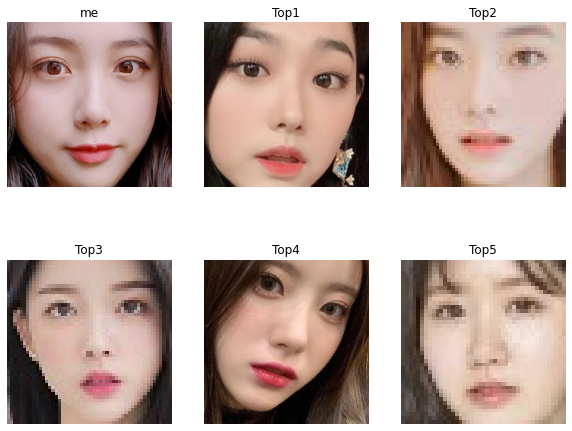

In [17]:
plt.figure(figsize=(10,8))

plt.subplot(231)
plt.imshow(cme1)
plt.axis('off')
plt.title('me')
plt.subplot(232)
plt.imshow(cimage1)
plt.axis('off')
plt.title('Top1')
plt.subplot(233)
plt.imshow(cimage2)
plt.axis('off')
plt.title('Top2')
plt.subplot(234)
plt.imshow(cimage3)
plt.axis('off')
plt.title('Top3')
plt.subplot(235)
plt.imshow(cimage4)
plt.axis('off')
plt.title('Top4')
plt.subplot(236)
plt.imshow(cimage5)
plt.axis('off')
plt.title('Top5')

Text(0.5, 1.0, 'Top5')

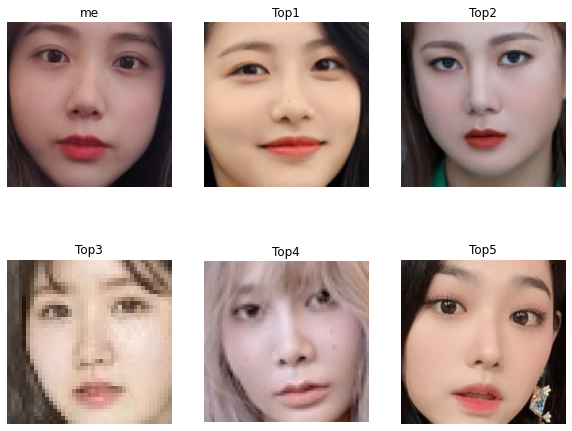

In [18]:
plt.figure(figsize=(10,8))

plt.subplot(231)
plt.imshow(cme2)
plt.axis('off')
plt.title('me')
plt.subplot(232)
plt.imshow(cimage6)
plt.axis('off')
plt.title('Top1')
plt.subplot(233)
plt.imshow(cimage7)
plt.axis('off')
plt.title('Top2')
plt.subplot(234)
plt.imshow(cimage5)
plt.axis('off')
plt.title('Top3')
plt.subplot(235)
plt.imshow(cimage8)
plt.axis('off')
plt.title('Top4')
plt.subplot(236)
plt.imshow(cimage1)
plt.axis('off')
plt.title('Top5')

### 5-2. 닮은 연예인과의 임베딩 거리를 그래프로 나타내어보기
공간으로 나타낸 그래프로도 나타내어볼까 생각해보았으나, 아무래도 평면 그래프로 나타내도 되는 지표라고 생각해서 그냥 막대그래프, 점그래프 등으로 나타내 보았다.

마찬가지로 기준 사진이 2개이기 때문에 모두 2개의 그래프로 나타내었다.

그리고 추가적으로 그래프에는 내 이미지간 거리도 포함하였다.

다른 이미지들과의 거리가 가까운 것인지 아닌지를 확인하기에 좋은 지표인 것 같아서 넣어봤다.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

mypic_dict1 = get_nearest_face_top10('김성연0')
mypic_dict2 = get_nearest_face_top10('김성연1')


df1=pd.DataFrame(list(mypic_dict1.items()),
                   columns=['Name', 'Distance'])
df2=pd.DataFrame(list(mypic_dict2.items()),
                   columns=['Name', 'Distance'])

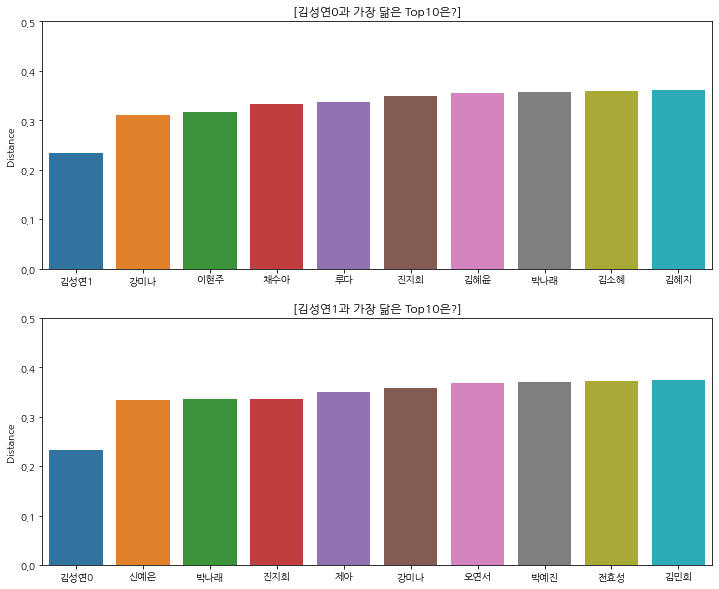

In [20]:
plt.figure(figsize=(12, 10))
plt.rcParams['font.family'] = 'NanumGothic'


# 김성연 0과 닮은 연예인 10명의 거리를 나타냄
plt.subplot(211)
sns.barplot(data=df1, x='Name', y= 'Distance').set_xlabel('')
plt.ylim([0, 0.5])
plt.title("[김성연0과 가장 닮은 Top10은?]")

# 김성연 1과 닮은 연예인 10명의 거리를 나타냄
plt.subplot(212)
sns.barplot(data=df2, x='Name', y= 'Distance').set_xlabel('')
plt.ylim([0, 0.5])
plt.title("[김성연1과 가장 닮은 Top10은?]")

plt.show()

닮은 사진 10개를 순서대로 출력하다보니 수치상의 차이가 크게 나타나보이지 않았다.

닮은 사진 10개를 비교한 것도 그렇고 막대 그래프의 y축 범위를 0.5까지 설정하여서 더욱 그래보이는 것 같다.

이제 아래 점 그래프를 보자

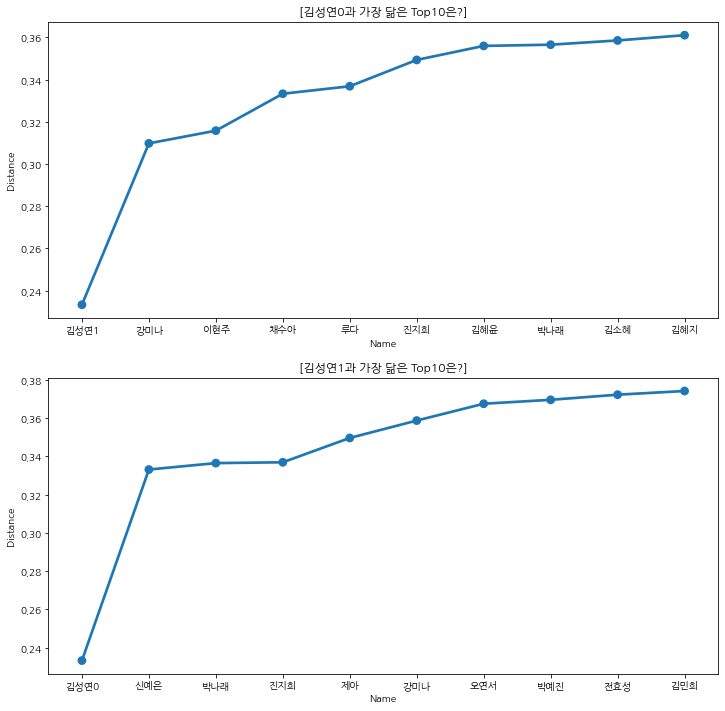

In [21]:
plt.figure(figsize=(12, 12))

plt.subplot(211)
sns.pointplot(data=df1, x="Name", y="Distance")
plt.title("[김성연0과 가장 닮은 Top10은?]")


plt.subplot(212)
sns.pointplot(data=df2, x="Name", y="Distance")
plt.title("[김성연1과 가장 닮은 Top10은?]")

plt.show()

확실히 점 그래프는 y축 범위가 가장 먼 이미지의 거리의 근사치이기 때문에 각 이미지의 거리 값의 차이를 직관적으로 확인할 수 있었다.

두 그래프를 보니, 김성연1의 top1인 신예은님보다는 김성연0의 top1인 강미나님과 더 닮았지 않았을까 추측할 수 있을 것 같다.

물론 수치상으로 비교해도 알겠지만 두 그래프를 나란히 놓고 보니 더욱 눈에 잘 보이는 것을 확인할 수 있다.

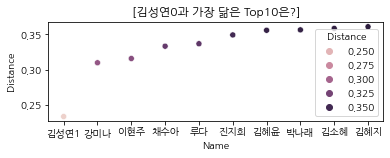

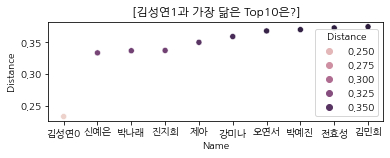

In [22]:
fig.set_size_inches(20, 8)

plt.subplot(211)
sns.scatterplot(data=df1, x="Name", y="Distance", hue="Distance")
plt.title("[김성연0과 가장 닮은 Top10은?]")
plt.show()

plt.subplot(212)
sns.scatterplot(data=df2, x="Name", y="Distance", hue="Distance")
plt.title("[김성연1과 가장 닮은 Top10은?]")
plt.show()

 위의 점그래프와 비슷한 유형이지지만 일정한 기준 값에 근사함을 수치를 기재함으로써 더 명확하게 보이기 때문에 비교하기 좋다고 생각하여 넣어보았다.

-----

## 6. 평가

#### (1) 얼굴 임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구하였나? (순위, 이름, 임베딩 거리 포함)
셀카 2장을 이용하여 임베딩 벡터를 활용해 닮은 연예인을 5명 이상 확인하였으며, 순위, 이름, 임베딩 거리를 포함하였다.

<br><br>

#### (2) 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈는가? (임베딩 거리 0.5 이내의 연예인)
총 250장의 연예인 사진을 이용하여 임베딩 거리가 0.5 이내인 닮은 연예인을 찾고자 하였다.
많은 이미지 사진을 활용하여 임베딩 거리 0.5 이내의 닮은꼴 연예인을 다수 찾아낼 수 있었다.

<br><br>

#### (3) 다양하고 재미있는 결과 시각화를 시도하였는가? (시각화 도구 1개 이상 사용)
matplotlib, seaborn 등을 이용하여 각 셀카별로 닮은 연예인 5명씩 사진을 나란히 놓아 시각화 하였다.

그를 통해 임베딩 거리가 나타내는 객관적인 닮음의 척도와 주관적인 생각을 비교해볼 수 있었다.
(시각적으로 이미지를 봤을 때 닮았는지 판단하는 것과 비교하는 것을 뜻함)

뿐만 아니라 막대그래프, 점 그래프 등을 통해 닮은 연예인 순위별로 임베딩 거리의 차이를 직관적으로 확인할 수 있었다.

<br><br>

---

## 7. 회고
이번 프로젝트에서는 시각화를 어떻게 해야할지 많이 고민했다.

이미지끼리 두고 비교하는 것과 수치들을 나열해서 비교하는 것 중 어떤 것이 효과적으로 차이를 확인할 수 있는지 고민하다가, 그냥 둘 다 표현해보았다.

지금 나란히 놓고 보니, 하나만 했으면 닮음의 정도를 직관적으로 느끼기에는 어려움이 있었을 것 같다.

시각화를 어떻게 할지 고민하면서, 시각화를 할 수 있는 도구들을 더 많이 알고 싶다고 느꼈다.


flask도 사용해보려고 열심히 서치했으나, 능력도 부족할 뿐더러 시간도 없어서 구현은 하지 못했다.

flask도 따로 공부 해봐야겠다.

언제나 프로젝트는 나의 부족함을 인지하게 한다.

조금 더 발전하도록 노력해야겠다.